# Scikit-Learn

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Import the Boston.csv dataset which can be found in the data directory of this course.
The goal of this exercise is to fit a linear regression between the independent features and the dependent variable.
To do this, you should do the following steps:
    
        1. Normalize all the independent features between 0 and 1.
           The dependent variable is medv and should not be normalized
            
        2. Fit a linear regression model on the data with medv being the dependent variable and all the other 
           variables being the independent variables.
           
        3. Get the estimated values for the dependent variable
        
        4. Inspect the estimated coefficients 
        
        5. Get the MSE, RMSE and MAE between the true and estimated values
           
        

In [2]:
# define path of datafile
data_path = "../data/Boston.csv"

# import the data
df = pd.read_csv(data_path)

In [3]:
# import the scaler class
from sklearn.preprocessing import MinMaxScaler

# get all the variables
features = list(df.columns)
features.remove("medv")

# initialize the scaler
scaler = MinMaxScaler()

# fit on numeric variables
scaler.fit(df[features])

# apply scaler
df[features] = scaler.transform(df[features])

# check
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [4]:
# import the linear regression model class
from sklearn.linear_model import LinearRegression

# initialize the model
linear_model = LinearRegression()

# fit the model on the data
linear_model.fit(X=df[features], y=df["medv"])

# get the predictions for the dependent variable
df["medv_preds"] = linear_model.predict(df[features])

# check
df["medv_preds"].head()

0    30.003843
1    25.025562
2    30.567597
3    28.607036
4    27.943524
Name: medv_preds, dtype: float64

In [5]:
# inspect the coefficients
for i in range(len(features)):
    
    print(features[i], linear_model.coef_[i])

('crim', -9.609757545376866)
('zn', 4.642045836688112)
('indus', 0.5608393272936982)
('chas', 2.6867338193448975)
('nox', -8.634573056953885)
('rm', 19.88368651433729)
('age', 0.06721501257744053)
('dis', -16.226661044381423)
('rad', 7.03913801665901)
('tax', -6.463327212285)
('ptratio', -8.955823978048532)
('black', 3.692827352721157)
('lstat', -19.017243613482908)


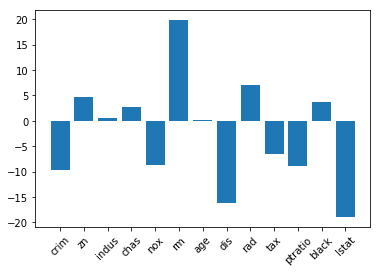

In [6]:
# plot coefficients
plt.bar(x=range(len(linear_model.coef_)), height=linear_model.coef_)
plt.xticks(range(len(linear_model.coef_)), features, rotation=45)
plt.show()

In [7]:
# import the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# get the mse
mse = mean_squared_error(df["medv"], df["medv_preds"])

# get the rmse
rmse = np.sqrt(mse)

# get the mae
mae = mean_absolute_error(df["medv"], df["medv_preds"])

# print
print("mse: %s -- rmse: %s -- mae: %s" %(mse, rmse, mae))

mse: 21.894831181729202 -- rmse: 4.679191295697281 -- mae: 3.270862810900316
